<a href="https://colab.research.google.com/github/LauraDimaria/Project_2/blob/main/White_Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###White Wine Quality

Laura Dimaria

6/30/22

Mount drive, imports, load data

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

In [6]:
filename = '/content/winequality-white.csv'
df = pd.read_csv(filename, sep = ';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


There are no unnecessary columns to drop.

Find and drop duplicates, check for missing values, check data types, and check min/max.

In [7]:
df.duplicated().sum()

937

In [8]:
df.drop_duplicates(inplace=True)

In [9]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [10]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


In [12]:
#Drop higher end outliers in fixed acidity, residual sugar, and citric acid
df.drop(df[df['fixed acidity'] > 11].index, inplace=True)

In [13]:
df.drop(df[df['residual sugar'] > 25].index, inplace=True)
df.drop(df[df['citric acid'] > 1].index, inplace=True)

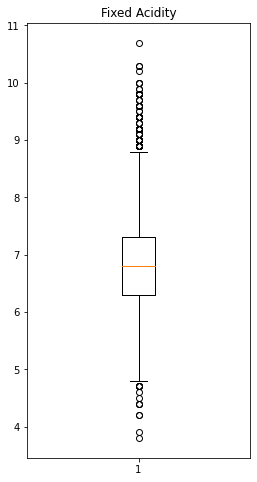

In [14]:
plt.figure(figsize=(4,8))
plt.title('Fixed Acidity')
plt.boxplot(df['fixed acidity']);

Min/Max and Q1/Q3 all look fairly even, we have a few lower outliers and a fair amount of higher ones.

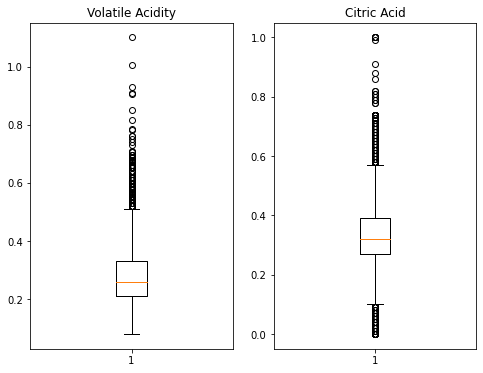

In [15]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8,6));
# Subplot 1 
axes[0].boxplot(df['volatile acidity']);
axes[0].set_title('Volatile Acidity', fontsize = 12);
# Subplot 2
axes[1].boxplot(df['citric acid']);
axes[1].set_title('Citric Acid', fontsize = 12);

Again, we have a good amount of outliers in these two columns.

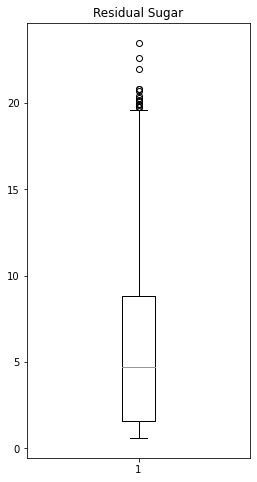

In [16]:
plt.figure(figsize=(4,8))
plt.title('Residual Sugar')
plt.boxplot(df['residual sugar']);

Not as many outliers. I would expect anything above the median to have scored a 6 or lower in quality.

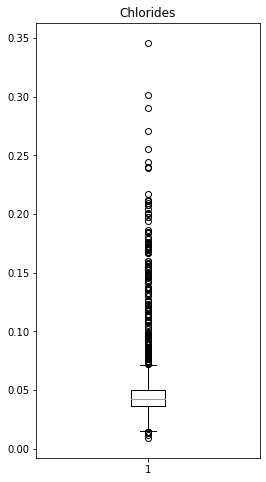

In [17]:
plt.figure(figsize=(4,8))
plt.title('Chlorides')
plt.boxplot(df['chlorides']);

In [18]:
df.drop(df[df['free sulfur dioxide'] > 200].index, inplace=True)

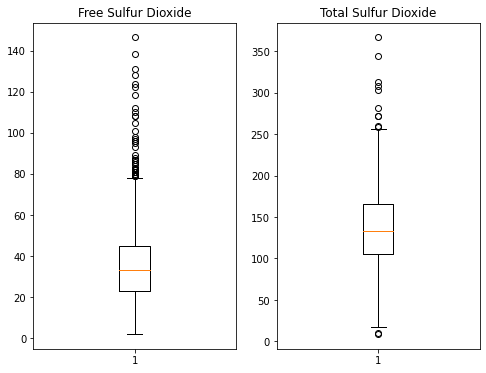

In [19]:
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize=(8,6));

axes[0].boxplot(df['free sulfur dioxide']);
axes[0].set_title('Free Sulfur Dioxide', fontsize = 12);

axes[1].boxplot(df['total sulfur dioxide']);
axes[1].set_title('Total Sulfur Dioxide', fontsize = 12);

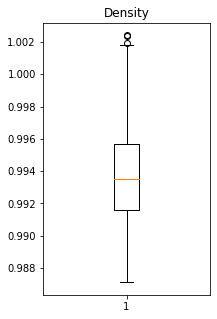

In [20]:
plt.figure(figsize=(3,5))
plt.title('Density')
plt.boxplot(df['density']);

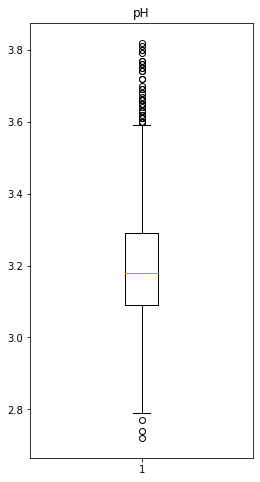

In [21]:
plt.figure(figsize=(4,8))
plt.title('pH')
plt.boxplot(df['pH']);

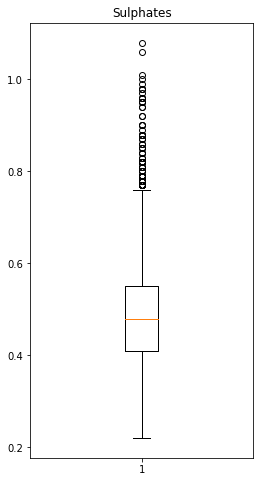

In [22]:
plt.figure(figsize=(4,8))
plt.title('Sulphates')
plt.boxplot(df['sulphates']);

The Q1 and Q3 range look very close, along with the min/max.
We have a good amount of outliers

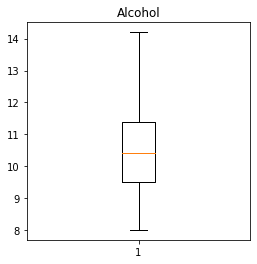

In [23]:
plt.figure(figsize=(4,4))
plt.title('Alcohol')
plt.boxplot(df['alcohol']);

Range of alcohol percentage, the median is right where I expected it to be.
I would expect the higher percentage scores to be in the lower quality range.

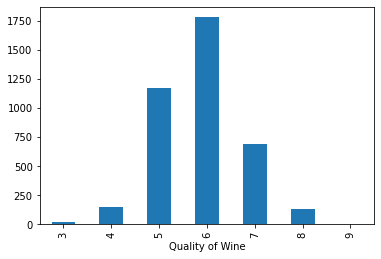

In [24]:
df['quality'].value_counts().sort_index().plot.bar();
plt.xlabel('Quality of Wine');

We have a lot of mediocre wine quality(5/6), some 'good' wine(7/8), a sampling of bad(3/4) and barely any excellent wine.


##White Wine Quality - Exploratory Analysis

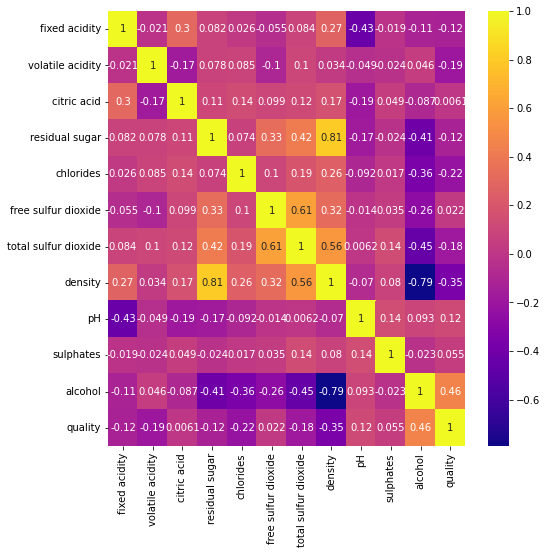

In [26]:
corr = df.corr()
plt.figure(figsize = (8, 8))
sns.heatmap(corr, cmap='plasma', annot=True);

Here we can see the correlation between features, as well as the target. There are only a few features with a positive correlation to our target, quality. Alcohol has the strongest with a 0.46 correlation, with pH being the second highest with 0.12. As someone who has a fair knowledge of the complexities of wine, I expected more correlation between quality and fixed acidity, as fixed acidity helps a wine to not fall flat on the palette.

Other than our target correlation, we have a very strong relationship between density and residual sugar, which I expected. There is also a strong positive correlation between free and total sulfur dioxide.

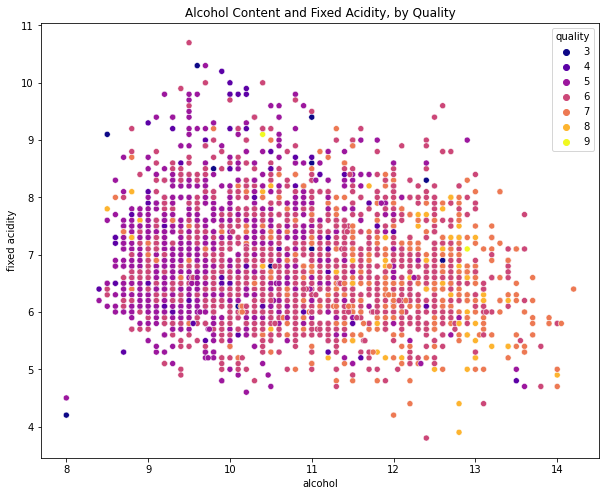

In [27]:
plt.figure(figsize=(10,8))
plt.title('Alcohol Content and Fixed Acidity, by Quality')
sns.scatterplot(data=df, x='alcohol', y='fixed acidity', hue='quality', palette='plasma');

Here we can see the relationship between alcohol content and fixed acidity. The wines with a higher quality rating tend to have a higher alcohol content and lower fixed acidity. Wines with a lower quality tend to be lower in alcohol content and also higher in fixed acidity.

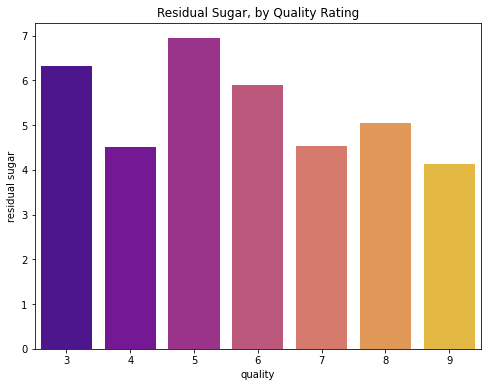

In [28]:
plt.figure(figsize=(8, 6))
plt.title('Residual Sugar, by Quality Rating')
sns.barplot(x='quality', y='residual sugar', data=df, ci=None, palette='plasma');

Here we can see that wines with a lower quality rating tend to have a higher count of residual sugar. Vinho Verde wines have many forms and is known for its characteristic higher sugar content and lower alcohol content. Recently, thanks to a wine renaissance, the grape has been making a comeback as a premium grape with less sugar content and higher alcohol.

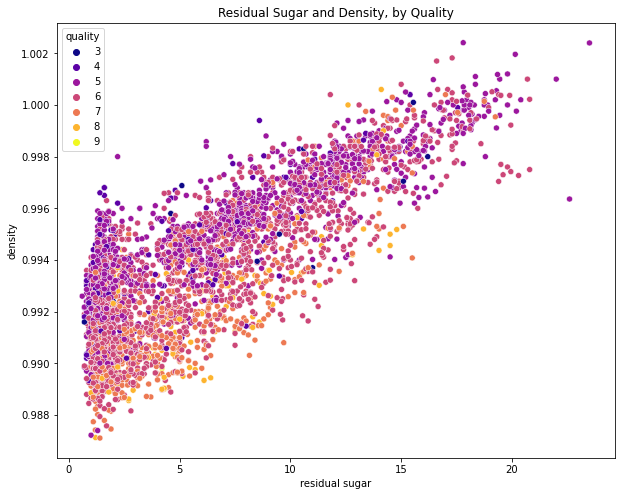

In [29]:
plt.figure(figsize=(10,8))
plt.title('Residual Sugar and Density, by Quality')
sns.scatterplot(data=df, x='residual sugar', y='density', hue='quality', palette='plasma');

As explained above, thanks to a renewal of interest in wine over the recent years, vinho verde has seen a spike in higher quality wines. We can see here the correlation between density and residual sugar, where higher quality wines tend to be lower in sugars as well as density. Wine density is affected by both sugar content and alcohol.



Evaluate model performance with appropriate metrics for the model
- classification report
Choose your "production" model and justify this decision

Go back through your code and ensure that you have provided clear comments (remember this is for your portfolio!)

In [31]:
#X, y, train test split
X = df.drop(columns = 'quality')
y = df['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

###Random Forest Classifier

In [32]:
#Instantiate
rf = RandomForestClassifier()

In [33]:
#Fit model on X and y train
rf.fit(X_train, y_train)

RandomForestClassifier()

In [34]:
#Predictions and train test scores
rf_preds = rf.predict(X_test)
rf_train_score = rf.score(X_train, y_train)
rf_test_score = rf.score(X_test, y_test)
print(rf_train_score)
print(rf_test_score)

1.0
0.5581395348837209


In [35]:
rf_est_depths = [estimator.get_depth() for estimator in rf.estimators_]       
max(rf_est_depths)

29

In [36]:
rf_param_grid = {'max_depth': [5, 10, 15],
              'min_samples_leaf': [50,100,200],
              'min_samples_split': [2, 10, 100]}

In [37]:
rf_grid_search = GridSearchCV(rf, rf_param_grid)
rf_grid_search.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'max_depth': [5, 10, 15],
                         'min_samples_leaf': [50, 100, 200],
                         'min_samples_split': [2, 10, 100]})

In [38]:
rf_grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 2}

In [39]:
rf_param_grid2 = {'max_depth': [6, 7, 8],
              'min_samples_leaf': [20, 25, 30],
              'min_samples_split': [10, 11, 12]}

rf_grid_search2 = GridSearchCV(rf, rf_param_grid2)
rf_grid_search2.fit(X_train, y_train)
rf_grid_search2.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'max_depth': 8, 'min_samples_leaf': 20, 'min_samples_split': 10}

In [40]:
rf_best_model = rf_grid_search2.best_estimator_

rf_train_preds = rf_best_model.predict(X_train)
rf_test_preds = rf_best_model.predict(X_test)

rf_best_model.fit(X_train, y_train)
rf_best_model.score(X_test, y_test)

0.5530839231547017

Our Random Forest model, paired with GridSearchCV yielded our best results for this model with .558.

### Logistic Regression

In [41]:
logreg = LogisticRegression(max_iter=150)
scaler = StandardScaler()

logreg_pipe = make_pipeline(scaler, logreg)

logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.5408232118758435
0.5490394337714863


Our Logistic Regression model scored less than both our Random Forest models, lets tune it.

###L1 Tuning

In [42]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
    log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l1')
    log_reg_pipe = make_pipeline(scaler, log_reg)
    log_reg_pipe.fit(X_train, y_train)
 

    train_scores.append(log_reg_pipe.score(X_train, y_train))
    test_scores.append(log_reg_pipe.score(X_test, y_test))

In [43]:
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.0020222446916076846,
 0.001: 0.2942366026289181,
 0.01: 0.5348837209302325,
 0.1: 0.5510616784630941,
 1: 0.5490394337714863,
 10: 0.5480283114256825,
 100: 0.5480283114256825,
 1000: 0.5480283114256825}

Tuning C with an error of L1 gave us a higher score with .551, still less than our RF model.

###L2 Tuning

In [44]:
c_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]
train_scores = []
test_scores = []

for c in c_values:
  log_reg = LogisticRegression(C=c, max_iter=1000, solver='liblinear', penalty='l2')
  log_reg_pipe = make_pipeline(scaler, log_reg)
  log_reg_pipe.fit(X_train, y_train)
 
  
  train_scores.append(log_reg_pipe.score(X_train, y_train))
  test_scores.append(log_reg_pipe.score(X_test, y_test))

In [45]:
{c:score for c, score in zip(c_values, test_scores)}

{0.0001: 0.4914054600606673,
 0.001: 0.5247724974721941,
 0.01: 0.5480283114256825,
 0.1: 0.5480283114256825,
 1: 0.5490394337714863,
 10: 0.5480283114256825,
 100: 0.5480283114256825,
 1000: 0.5480283114256825}

Tuning C with an error of L2 produced a lower score, only .549.

###Feature Engineering

In [46]:
df_copy = df.copy()

In [47]:
df_copy['normed sulfur dioxide'] = df_copy['total sulfur dioxide'] - df_copy['free sulfur dioxide']
df_copy.drop(columns = ['free sulfur dioxide', 'total sulfur dioxide'], inplace=True)

In [48]:
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol,quality,normed sulfur dioxide
0,7.0,0.27,0.36,20.7,0.045,1.0010,3.00,0.45,8.8,6,125.0
1,6.3,0.30,0.34,1.6,0.049,0.9940,3.30,0.49,9.5,6,118.0
2,8.1,0.28,0.40,6.9,0.050,0.9951,3.26,0.44,10.1,6,67.0
3,7.2,0.23,0.32,8.5,0.058,0.9956,3.19,0.40,9.9,6,139.0
6,6.2,0.32,0.16,7.0,0.045,0.9949,3.18,0.47,9.6,6,106.0


In [49]:
X = df_copy.drop(columns = 'quality')
y = df_copy['quality']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

Random Forest and Logistic Regression with Feature Engineering

In [50]:
rf_param_grid3 = {'max_depth': [6, 7, 8],
              'min_samples_leaf': [20, 25, 30],
              'min_samples_split': [10, 11, 12]}

rf_grid_search3 = GridSearchCV(rf, rf_param_grid3)
rf_grid_search3.fit(X_train, y_train)
rf_grid_search3.best_params_

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  UserWarning,


{'max_depth': 6, 'min_samples_leaf': 30, 'min_samples_split': 12}

In [51]:
rf_best_model2 = rf_grid_search3.best_estimator_

rf_train_preds2 = rf_best_model2.predict(X_train)
rf_test_preds2 = rf_best_model2.predict(X_test)

rf_best_model2.fit(X_train, y_train)
rf_best_model2.score(X_test, y_test)

0.5621840242669363

Our model using the normed sulfur dioxide column is scoring the best so far, .562

In [52]:
logreg = LogisticRegression(max_iter=1000)

logreg_pipe = make_pipeline(scaler, logreg)

logreg_pipe.fit(X_train, y_train)
print(logreg_pipe.score(X_train, y_train))
print(logreg_pipe.score(X_test, y_test))

0.5381241565452092
0.5460060667340748


Our LogReg model using feature engineering scored less than the original models

Classification Report for Random Forest model

In [53]:
print('Classification Report for Training Set')
rf_train_report = classification_report(y_train, rf_train_preds2)
print(rf_train_report)

print('Classification Report for Testing Set')
rf_test_report = classification_report(y_test, rf_test_preds2)
print(rf_test_report)

Classification Report for Training Set
              precision    recall  f1-score   support

           3       0.00      0.00      0.00        16
           4       0.00      0.00      0.00       103
           5       0.64      0.57      0.60       884
           6       0.54      0.79      0.65      1338
           7       0.59      0.26      0.36       517
           8       0.00      0.00      0.00       102
           9       0.00      0.00      0.00         4

    accuracy                           0.57      2964
   macro avg       0.25      0.23      0.23      2964
weighted avg       0.54      0.57      0.53      2964

Classification Report for Testing Set
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        50
           5       0.59      0.56      0.58       291
           6       0.54      0.79      0.64       444
           7       0.66      0.26      0.37       172
 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classificat

###Production Model

While none of these models are producing great results, the best so far is the tuned Random Forest Classifier using feature engineering. Realistically, I should have binned the target column into three bins, poor, average, and excellent. While this would not have helped the data be more evenly distributed, it would have help lump the data into less classes and probably helped the model learn more about the poor and excellent classes as opposed to having 7 different ones of varying weights.